In [2]:
# Import libs
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def xshow(n: list,
          x: list,
          title='title',
          xlabel='x',
          ylabel='y',
          plotStyle='plot',
          annotationEnable=False) -> [plt.figure, plt.axes]:
    ''' 描绘序列, 绘制棒棒糖图(Lollipop Chart)

    :x: 需要绘制的序列
    :n: 与x等长的自然数序列
    :title: 图标题
    :xlabel: x轴标签
    :ylabel: y轴标签
    :plotStyle: 绘制风格，'stem'柱状散点,'plot'折线
    :annotationEnable: 数值标注使能
    '''

    # plot the chart
    fig, ax = plt.subplots(figsize=(15, 4), dpi=100)
    if plotStyle == 'stem':
        ax.stem(n, x)
    elif plotStyle == 'plot':
        ax.plot(n, x)
    else:
        print("No such style yet")
        return

    # Title, Lable, Ticks, and Ylim
    ax.set_title(title, fontdict={'size': 20})
    ax.set_ylabel(ylabel, fontdict={'size': 20})
    plt.tick_params(labelsize=20)
    # ax.set_xticks(n)
    ax.set_xlabel(xlabel, fontdict={'size': 20})

    # Annotation
    if (annotationEnable):
        if (round(np.min(x), 2) < 0):
            ax.set_ylim(np.min(x) - 0.5, np.max(x) + 0.5)
        else:
            ax.set_ylim(0, np.max(x) + 0.5)
    
        for i, j in zip(n, x):
            ax.text(i,
                    j + .1,
                    s=round(j, 2),
                    horizontalalignment='center',
                    verticalalignment='bottom',
                    fontsize=14)

    plt.show()

    return fig, ax



In [4]:
# 窗函数
def recetangle(N: int) -> list:
    '''生成矩形窗序列
    
    :N: 阶数
    :n: 长度
    :return wn: 输出序列
    '''
    wn = np.ones(N - 1)
    return wn


def Hamming(N: int) -> list:
    '''生成汉明窗序列
    
    :N: 阶数
    :n: 长度
    :return wn: 输出序列
    '''
    wn = []
    for i in range(0, N - 1):
        wn.append(0.54 - 0.46 * np.cos(2 * i * np.pi / (N - 1)))
    return wn


def Hanning(N: int) -> list:
    '''生成汉宁窗序列
    
    :N: 阶数
    :n: 长度
    :return wn: 输出序列
    '''
    wn = []
    for i in range(0, N - 1):
        wn.append(0.5 - 0.5 * np.cos(2 * i * np.pi / (N - 1)))
    return wn


In [5]:
def hlpGenerate(wc: float, wn: list, N: int) -> list:
    '''生成FIR低通加窗单位抽样响应序列
    
    :wc: 中心频率
    :wn: 窗函数序列
    :N: 阶数
    '''
    tau = (N - 1) / 2
    hn = []
    for i in range(0, N - 1):
        if (i != tau):
            hn.append(np.sin((i - tau) * wc) / (i - tau) / np.pi)
        else:
            hn.append(wc / np.pi)                              # 无定义处单独考虑
    
    # 加窗
    hn = np.multiply(hn, wn)
    return hn


def hbpGenerate(wl: float, wh: float, wn: list, N: int) -> list:
    '''生成FIR带通加窗单位抽样响应序列
    
    :wl: 通带低边缘频率
    :wh: 通带高边缘频率
    :wn: 窗函数序列
    :N: 阶数
    '''
    tau = (N - 1) / 2
    hn = []
    for i in range(0, N - 1):
        if (i != tau):                          
            hn.append((np.sin((i - tau) * wh) - np.sin(
                (i - tau) * wl)) / (i - tau) / np.pi)           # 带通等效于低通（wc=wh）减去低通（wc=wl）
        else:
            hn.append((wh - wl) / np.pi)

    # 加窗
    hn = np.multiply(hn, wn)
    return hn

2.1 设计两个FIR低通滤波器，截止频率ωc=0.5π。

（1）用矩形窗，窗长N=31。得出第一个滤波器的单位抽样响应序列 h1(n)。记录h1(n)的各个抽样值，画出h1(n)的图形（用 stem(.)）。求出该滤波器的频率响应（的 N个抽样）H1(k)，画出| H1(k)|的图形。

（2）用汉明窗，窗长 N=31。得出第二个滤波器的单位抽样响应序列 h2(n)。记录h2(n)的各个抽样值，画出 h2(n)的图形。求出滤波器的频率响应 H2(k)，画出| H2(k)|的图形。


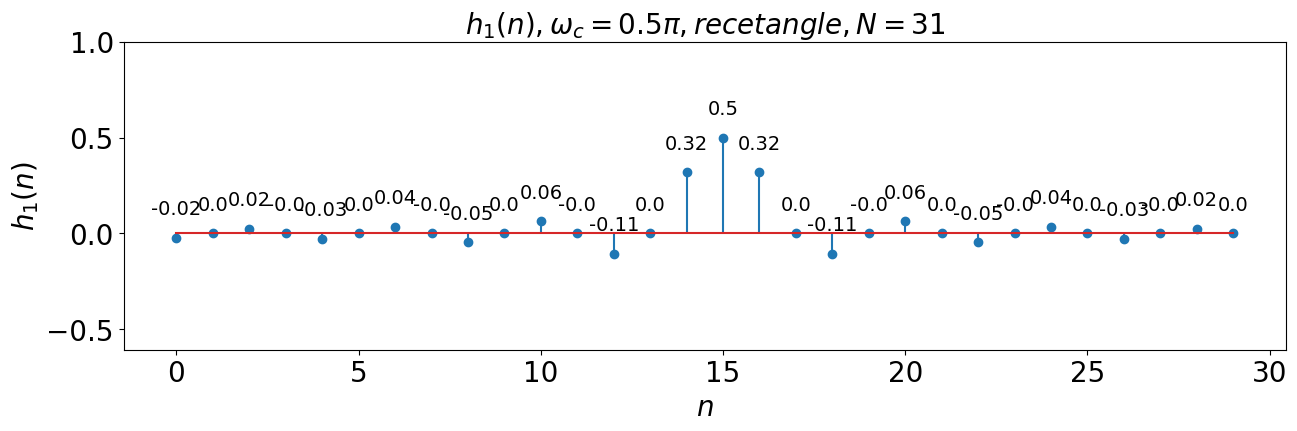

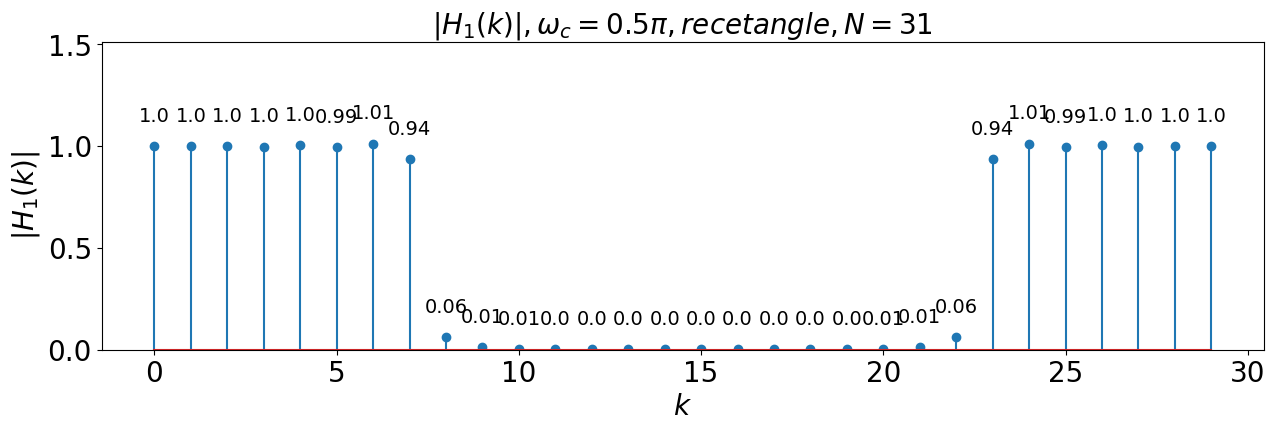

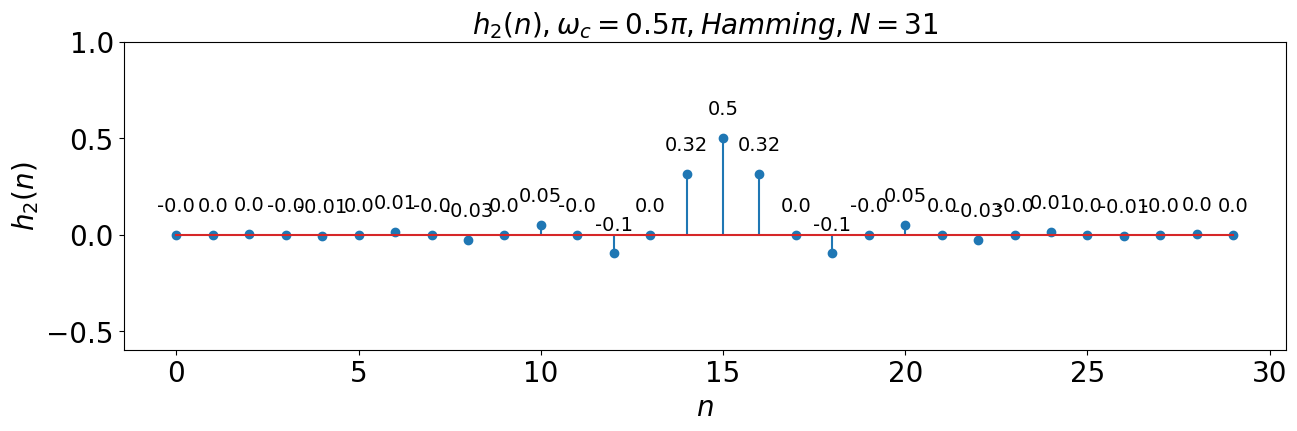

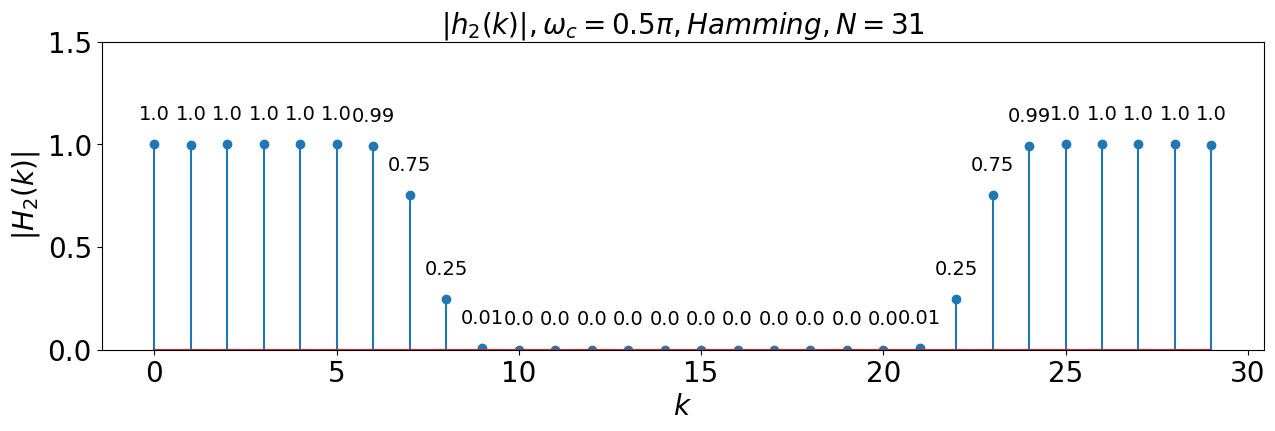

(<Figure size 1500x400 with 1 Axes>,
 <Axes: title={'center': '$|h_2(k)|, \\omega_c = 0.5\\pi, Hamming, N = 31$'}, xlabel='$k$', ylabel='$|H_2(k)|$'>)

In [95]:
N = 31                                      # 窗长
wc = 0.5 * np.pi                            # 低通滤波器中心频率
# 生成单位抽样响应序列
hn1 = hlpGenerate(wc, recetangle(N), N)     
hn2 = hlpGenerate(wc, Hamming(N), N)
# FFT变换求频率响应
hk1 = np.fft.fft(hn1)
hk2 = np.fft.fft(hn2)

# plot
xshow(range(0, N - 1), hn1, '$h_1(n), \omega_c = 0.5\pi, recetangle, N = 31$', '$n$', '$h_1(n)$', 'stem', True)
xshow(range(0, N - 1), np.abs(hk1), '$|H_1(k)|, \omega_c = 0.5\pi, recetangle, N = 31$', '$k$', '$|H_1(k)|$','stem', True)
xshow(range(0, N - 1), hn2, '$h_2(n), \omega_c = 0.5\pi, Hamming, N = 31$', '$n$', '$h_2(n)$','stem', True)
xshow(range(0, N - 1), np.abs(hk2), '$|h_2(k)|, \omega_c = 0.5\pi, Hamming, N = 31$', '$k$', '$|H_2(k)|$','stem', True)

2.2 产生长度为 200 点、均值为零的均匀分布[-0.5, 0.5]随机信号序列 x(n)（可用
rand(1,200)−0.5）。显示 x(n)。求出并显示其幅度谱|X(k)|，观察特征。


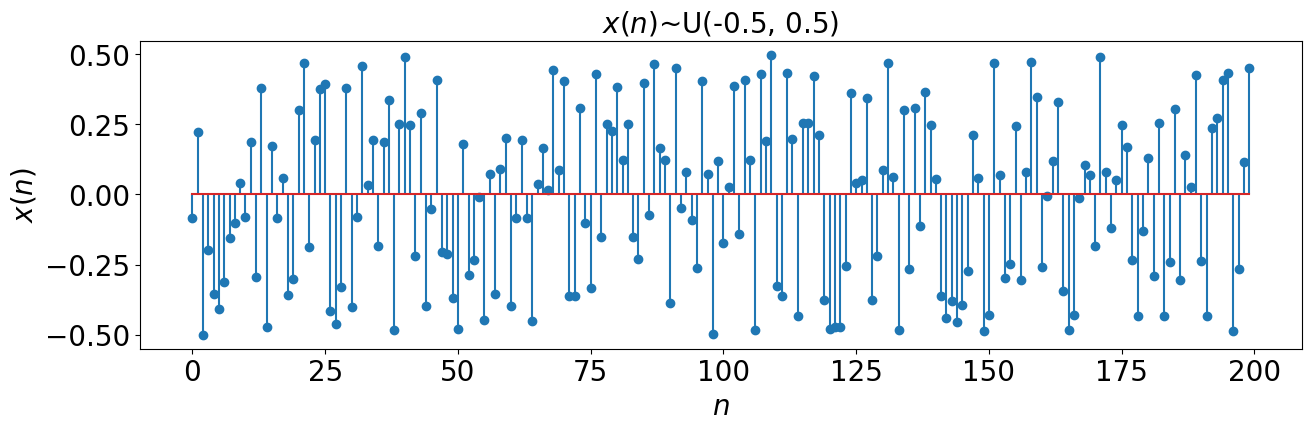

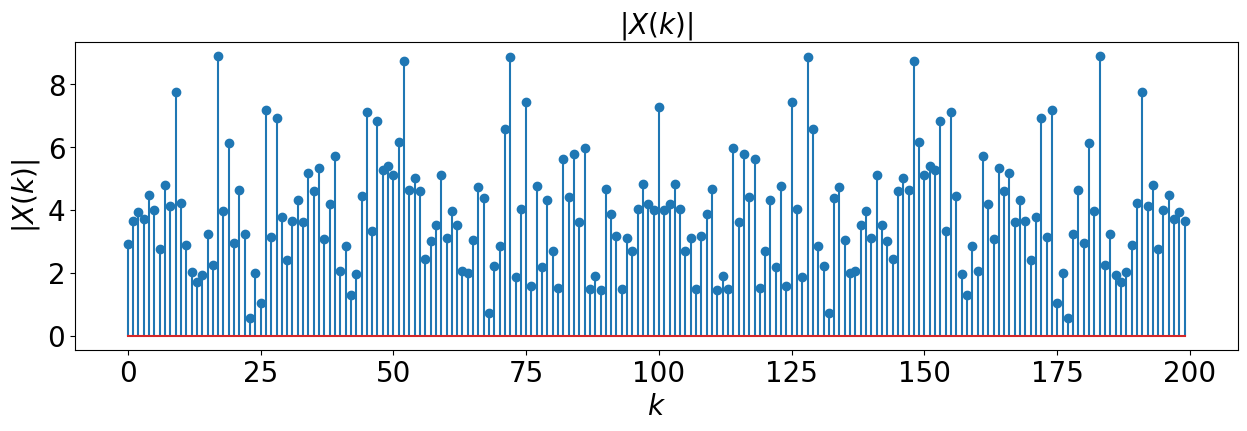

(<Figure size 1500x400 with 1 Axes>,
 <Axes: title={'center': '$|X(k)|$'}, xlabel='$k$', ylabel='$|X(k)|$'>)

In [7]:
np.random.seed(1)                   # 生成随机种子，便于保证实验中数据一致性
xn = np.random.rand(200) - 0.5      # 生成随机信号序列
xk = np.fft.fft(xn)                 # FFT变换求频率响应

# plot
xshow(range(200), xn, '$x(n)$~U(-0.5, 0.5)', '$n$', '$x(n)$','stem')
xshow(range(200), np.abs(xk), '$|X(k)|$', '$k$', '$|X(k)|$','stem')


2.3 滤波

（1）将 x(n)作为输入，经过第一个滤波器后的输出序列记为 y1(n)，其幅度谱记为|Y1(k)|。画出|X(k)|与|Y1(k)|，讨论滤波前后信号的频谱特征。

（2）将 x(n)作为输入，经过第二个滤波器后的输出序列记为 y2(n)，其幅度谱记为|Y¬2(k)|。比较|Y1(k)|与|Y2(k)|的图形，讨论不同的窗函数设计出的滤波器的滤波效果。


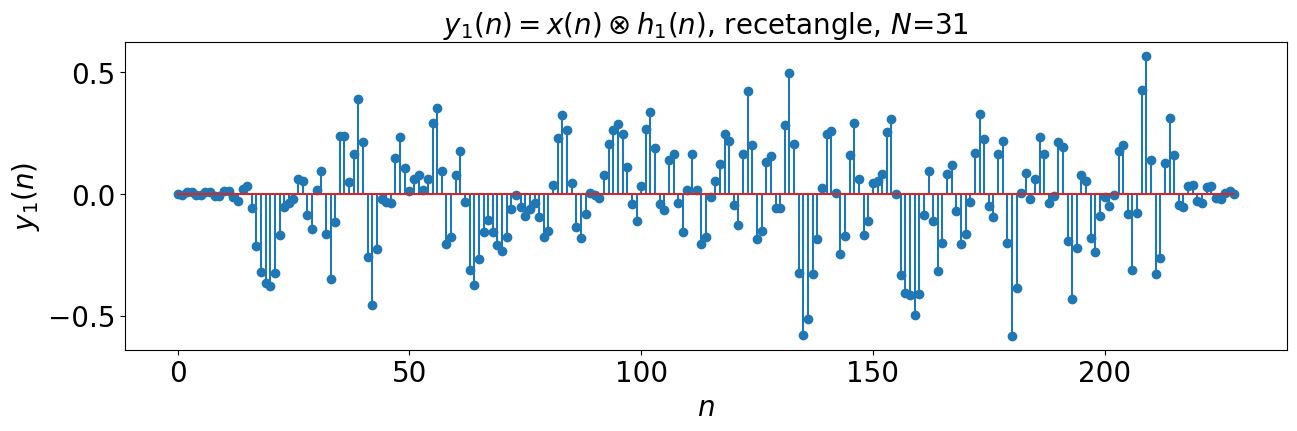

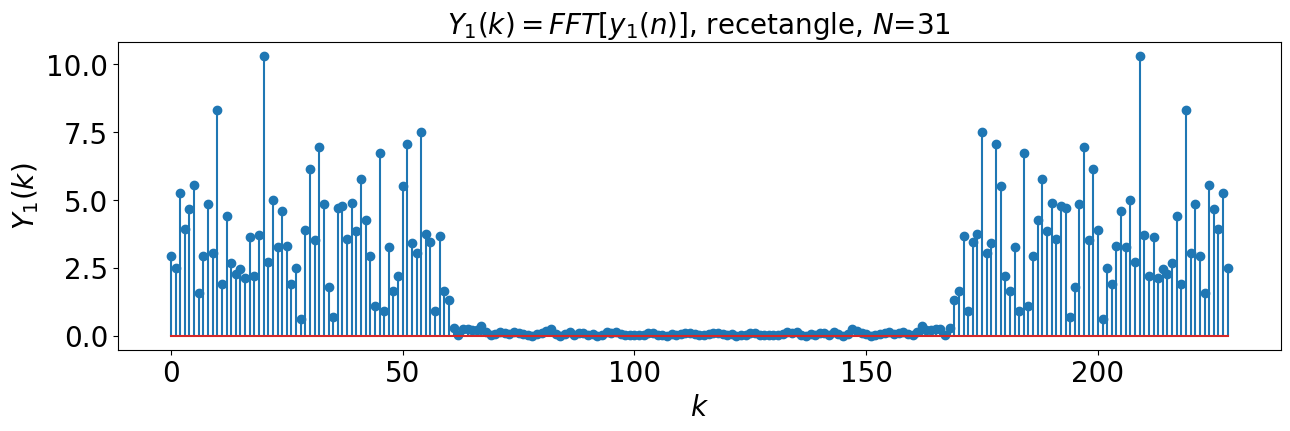

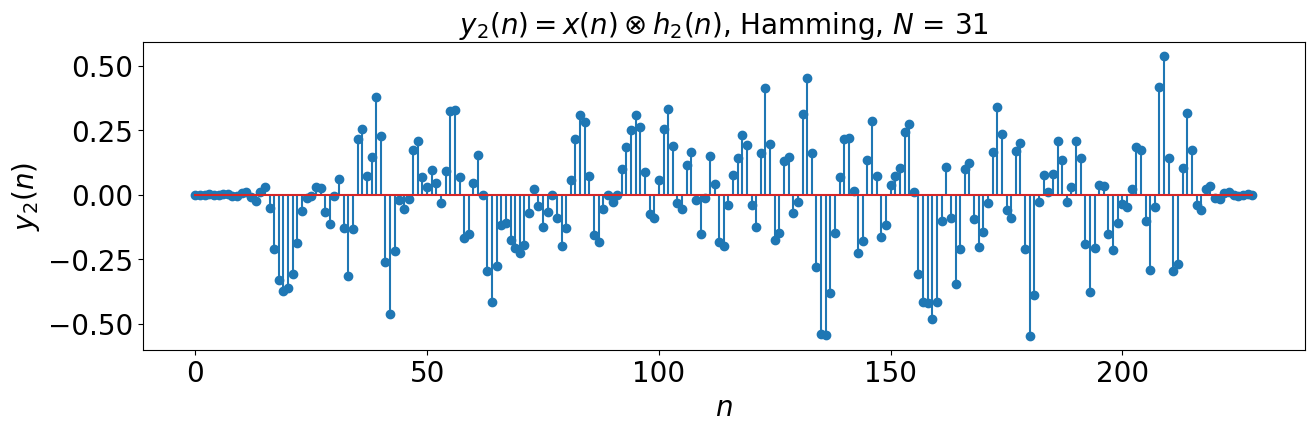

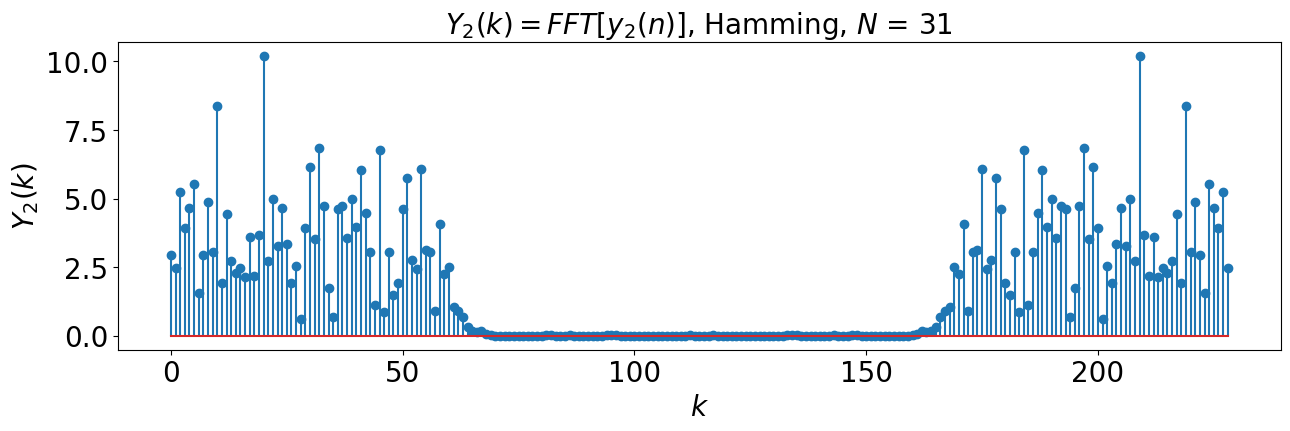

(<Figure size 1500x400 with 1 Axes>,
 <Axes: title={'center': '$Y_2(k) = FFT[y_2(n)]$, Hamming, $N$ = 31'}, xlabel='$k$', ylabel='$Y_2(k)$'>)

In [96]:
yn1 = np.convolve(xn, hn1)      # 卷积
yk1 = np.fft.fft(yn1)

yn2 = np.convolve(xn, hn2)
yk2 = np.fft.fft(yn2)

xshow(range(229), yn1, '$y_1(n) = x(n) \otimes h_1(n)$, recetangle, $N$=31','$n$','$y_1(n)$','stem')
xshow(range(229), np.abs(yk1), '$Y_1(k) = FFT[y_1(n)]$, recetangle, $N$=31','$k$','$Y_1(k)$','stem')
xshow(range(229), yn2, '$y_2(n) = x(n) \otimes h_2(n)$, Hamming, $N$ = 31','$n$','$y_2(n)$','stem')
xshow(range(229), np.abs(yk2), '$Y_2(k) = FFT[y_2(n)]$, Hamming, $N$ = 31','$k$','$Y_2(k)$','stem')


2.4 设计第三个 FIR 低通滤波器，截止频率ωc=0.5π。用矩形窗，窗长 N=127。用它对 x(n)进行滤波。画出输出信号 y3(n)的幅度谱|Y3(k)|，并与|Y1(k)|比较，讨论不同窗长设计出的滤波器的滤波效果。

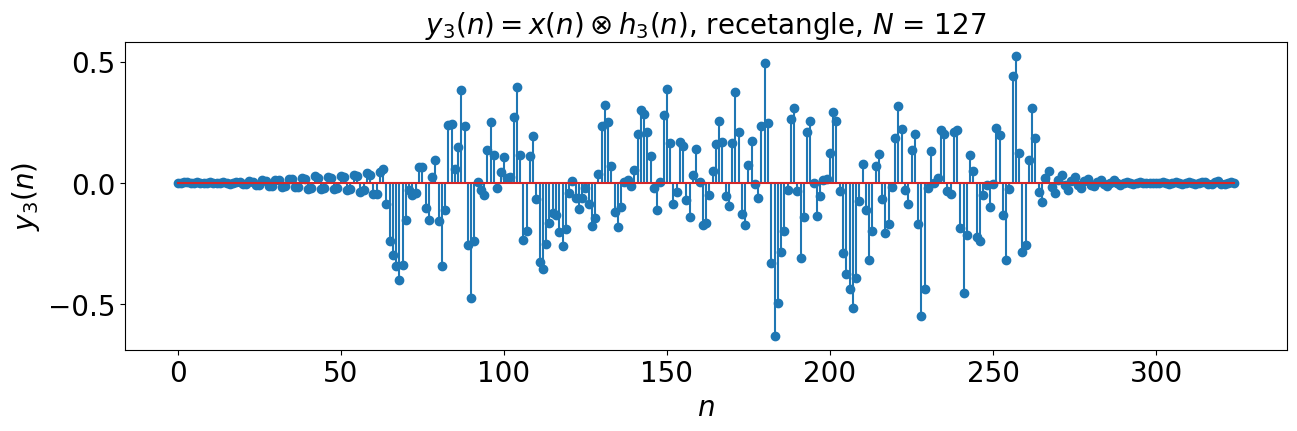

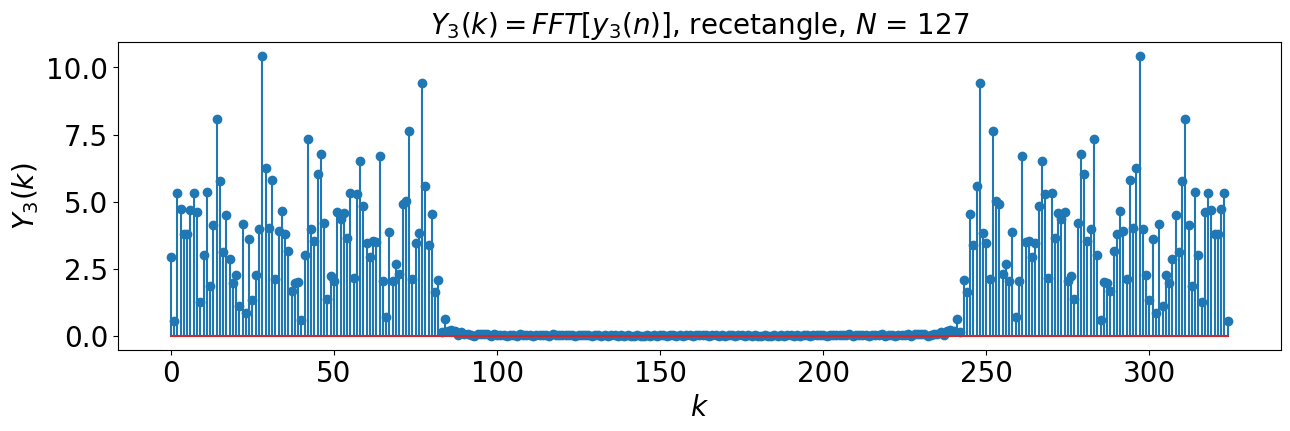

(<Figure size 1500x400 with 1 Axes>,
 <Axes: title={'center': '$Y_3(k) = FFT[y_3(n)]$, recetangle, $N$ = 127'}, xlabel='$k$', ylabel='$Y_3(k)$'>)

In [97]:
hn3 = hlpGenerate(wc, recetangle(127), 127)
yn3 = np.convolve(xn, hn3)
yk3 = np.fft.fft(yn3)

xshow(range(325), yn3, '$y_3(n) = x(n) \otimes h_3(n)$, recetangle, $N$ = 127','$n$','$y_3(n)$','stem')
xshow(range(325), np.abs(yk3), '$Y_3(k) = FFT[y_3(n)]$, recetangle, $N$ = 127','$k$','$Y_3(k)$','stem')

2.5 分别用矩形窗及汉宁窗设计 FIR 带通数字滤波器，其中通带边缘频率分别为 160 Hz 及 1.5 kHz，过渡带宽 150 Hz。分别用设计得到的数字滤波器对附件音频文件“05-03-noisy.wav”（数据读取函数 audioread）进行滤波，画出滤波以后的信号时间序列及幅频响应图，并讨论
滤波效果。

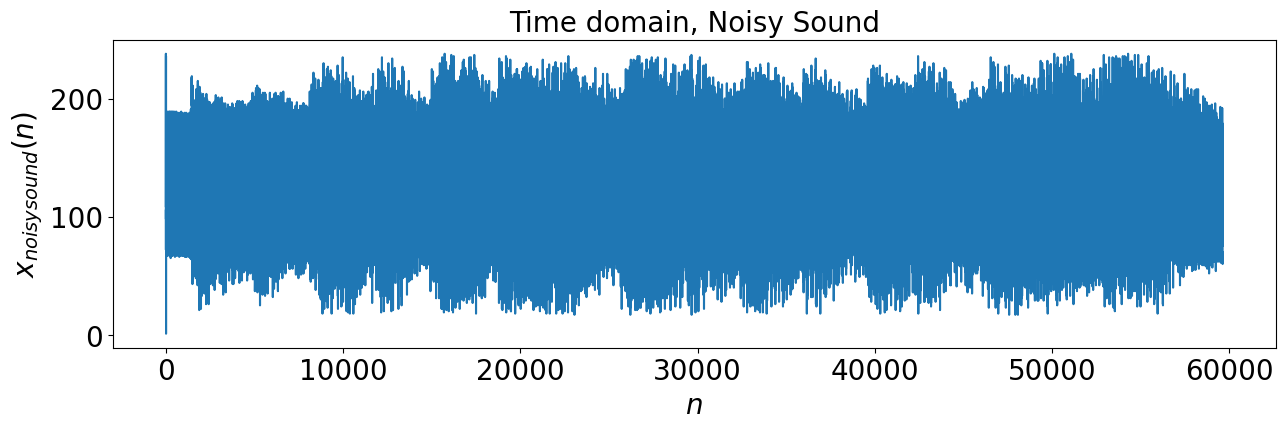

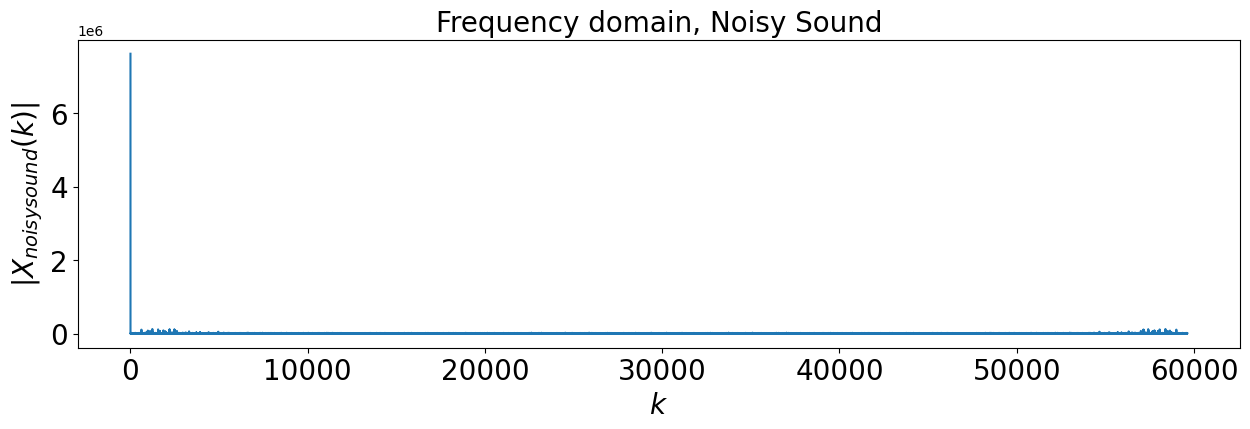

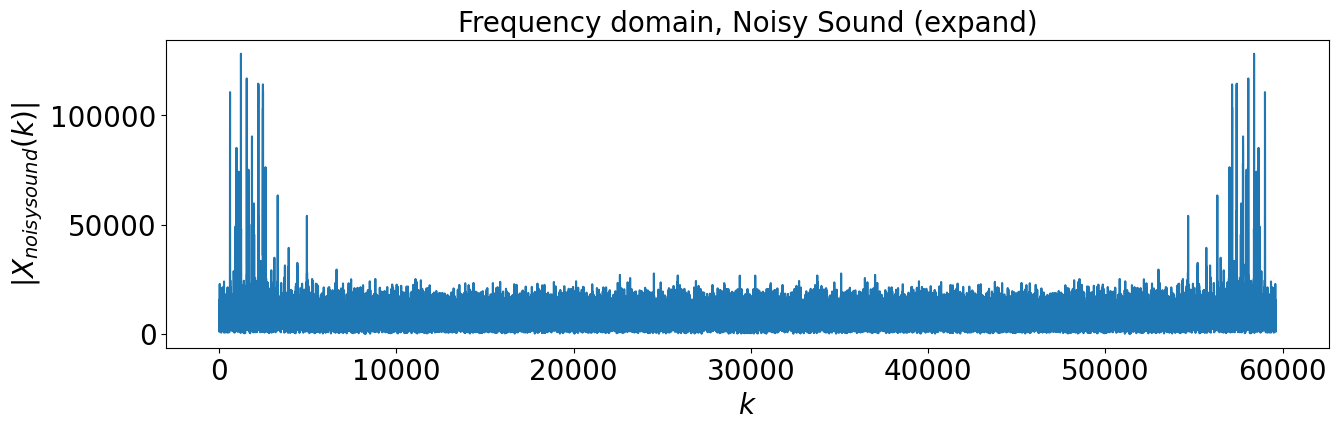

(<Figure size 1500x400 with 1 Axes>,
 <Axes: title={'center': 'Frequency domain, Noisy Sound (expand)'}, xlabel='$k$', ylabel='$|X_{noisysound}(k)|$'>)

In [93]:
import scipy.io.wavfile as wav
sample_rate, data = wav.read('05-03-noisy.wav') # 提取数据

data_f = np.fft.fft(data)
data_N = len(data)

xshow(range(data_N), data,title='Time domain, Noisy Sound', xlabel='$n$', ylabel='$x_{noisysound}(n)$', plotStyle='plot')
xshow(range(data_N), np.abs(data_f), title='Frequency domain, Noisy Sound', xlabel='$k$', ylabel='$|X_{noisysound}(k)|$', plotStyle='plot')
xshow(range(data_N)[1:data_N-1], np.abs(data_f[1:data_N-1]), title='Frequency domain, Noisy Sound (expand)', xlabel='$k$', ylabel='$|X_{noisysound}(k)|$', plotStyle='plot')


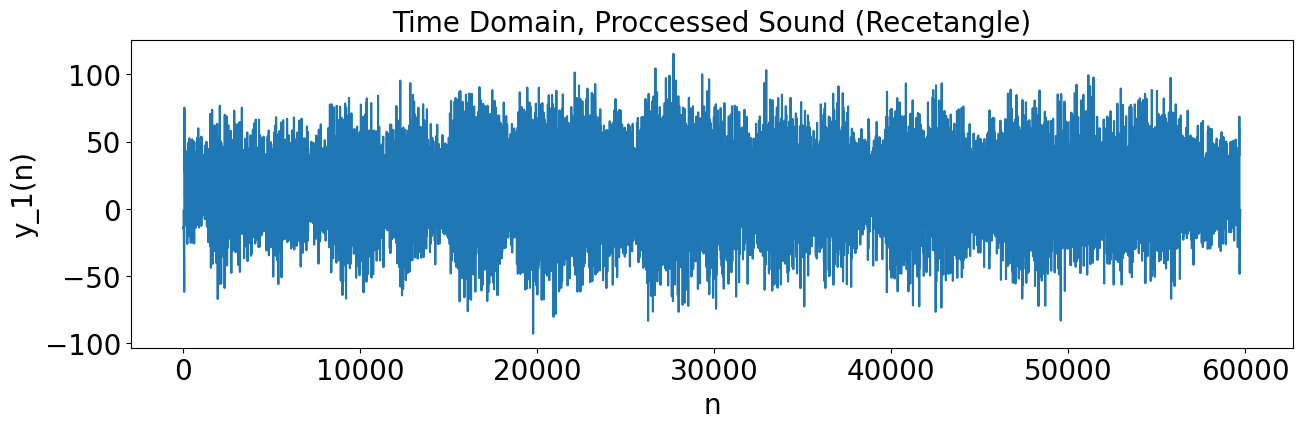

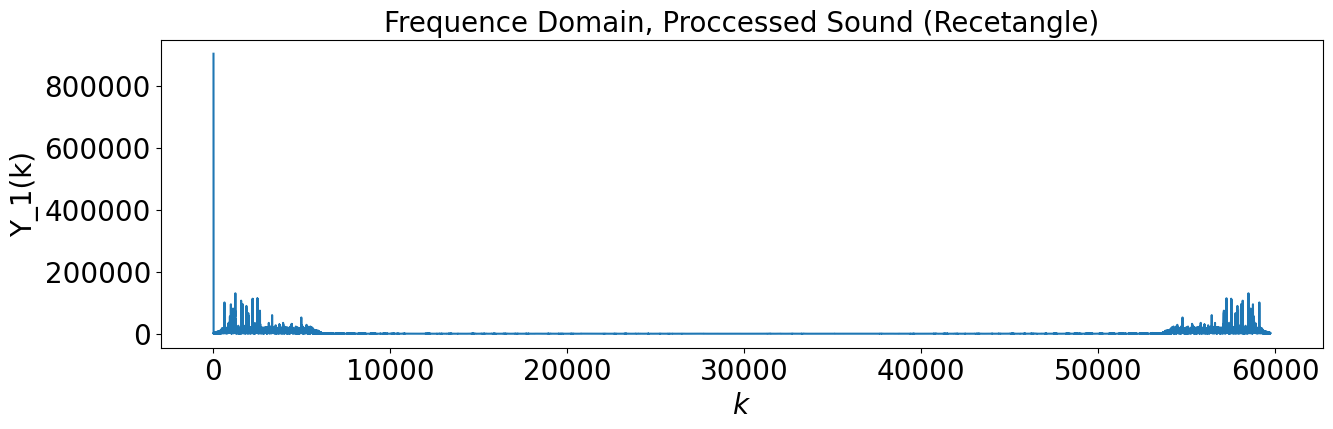

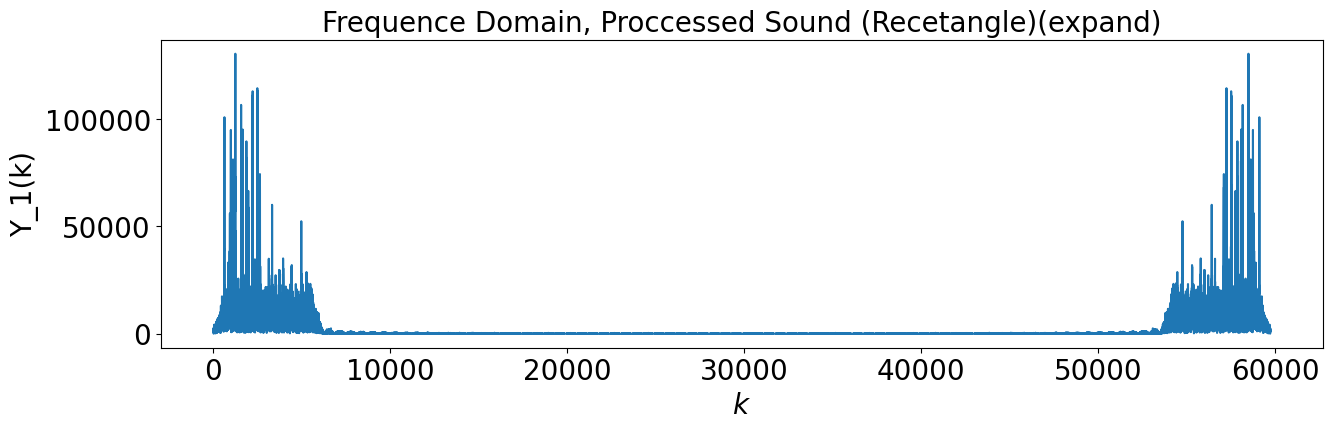

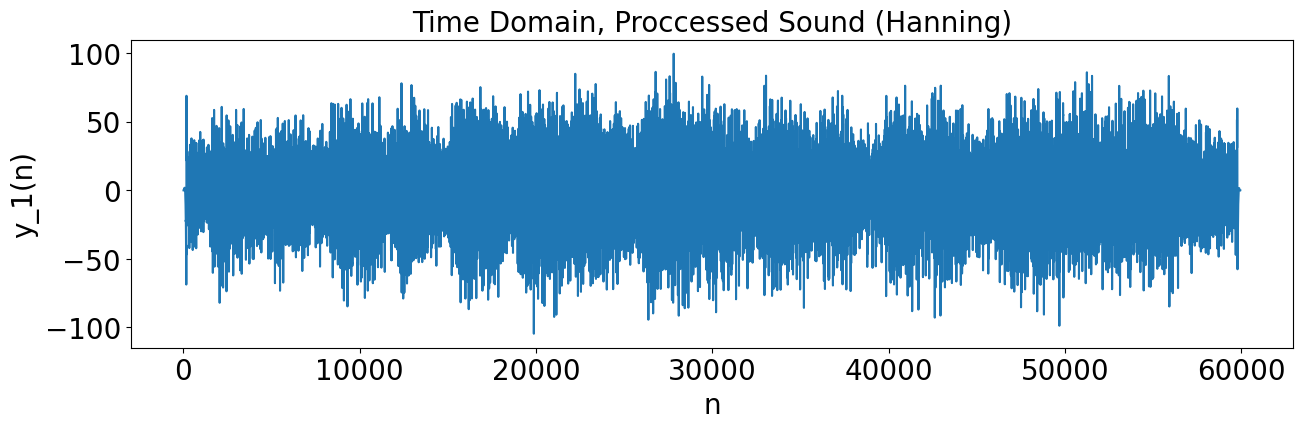

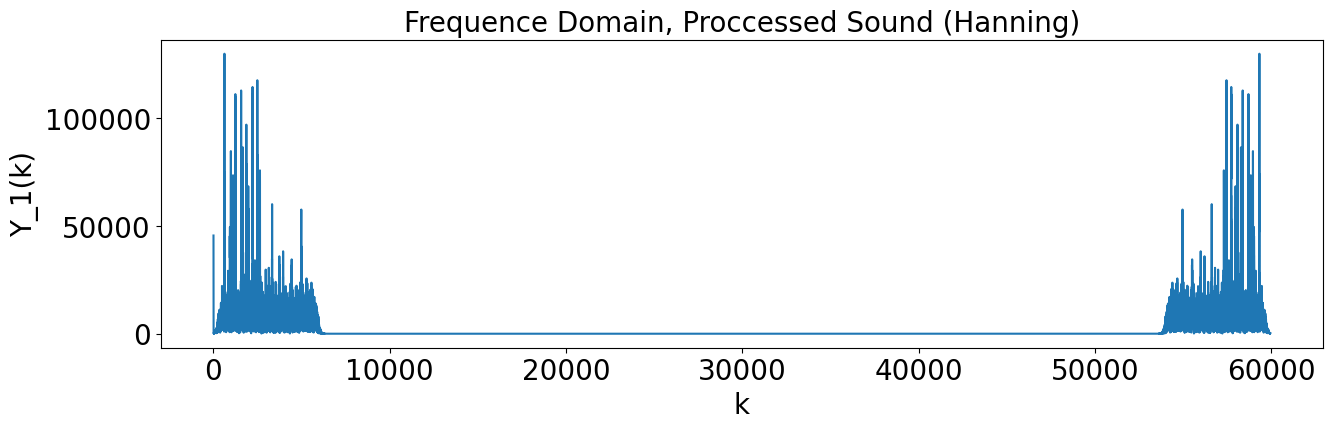

(<Figure size 1500x400 with 1 Axes>,
 <Axes: title={'center': 'Frequence Domain, Proccessed Sound (Hanning)'}, xlabel='k', ylabel='Y_1(k)'>)

In [99]:
# 设置带通滤波器参数
fl = 160               #
fh = 1500
detaf = 150         # 过渡带宽
# 过渡带宽转数字频率表示
detaw = 2 * np.pi * 150 / sample_rate
# 求截止数字频率
wl = 2 * np.pi * (fl - 0.5 * detaf) / sample_rate  
wh = 2 * np.pi * (fh + 0.5 * detaf) / sample_rate

# 矩形窗
recetangleN = int(1.8 * np.pi / detaw) + 1
if (not (recetangleN // 2)):
    recetangleN += 1
# 汉宁窗
hanningN = int(6.2 * np.pi / detaw) + 1
if (not (hanningN // 2)):
    hanningN += 1

hbpn1 = hbpGenerate(wl, wh, recetangle(recetangleN), recetangleN)
hbpn2 = hbpGenerate(wl, wh, Hanning(hanningN), hanningN)


ybpn1 = np.convolve(data, hbpn1)
ybpk1 = np.fft.fft(ybpn1)

ybpn2 = np.convolve(data, hbpn2)
ybpk2 = np.fft.fft(ybpn2)

ydata_n1 = len(ybpn1)
ydata_n2 = len(ybpn2)

xshow(range(ydata_n1), ybpn1, title = 'Time Domain, Proccessed Sound (Recetangle)', xlabel= 'n', ylabel='y_1(n)')
xshow(range(ydata_n1), np.abs(ybpk1), title = 'Frequence Domain, Proccessed Sound (Recetangle)', xlabel = '$k$', ylabel = 'Y_1(k)')
xshow(range(ydata_n1)[1:ydata_n1], np.abs(ybpk1[1:ydata_n1]), title = 'Frequence Domain, Proccessed Sound (Recetangle)(expand)', xlabel = '$k$', ylabel = 'Y_1(k)')
xshow(range(ydata_n2), ybpn2, title = 'Time Domain, Proccessed Sound (Hanning)', xlabel= 'n', ylabel='y_1(n)')
xshow(range(ydata_n2), np.abs(ybpk2), title = 'Frequence Domain, Proccessed Sound (Hanning)', xlabel= 'k', ylabel='Y_1(k)')

